In [2]:
!pip install SimpleITK

     |████████████████████████████████| 47.4MB 95kB/s 


**Welcome to the first SimpleITK Notebook demo:**

SimpleITK Image Basics
This document will give a brief orientation to the SimpleITK Image class.

First we import the SimpleITK Python module. By convention our module is imported into the shorter and more Pythonic "sitk" local name.

In [3]:
from __future__ import print_function
%matplotlib inline
import matplotlib.pyplot as plt
import SimpleITK as sitk

**Image Construction**

There are a variety of ways to create an image. All images' initial value is well defined as zero.

In [4]:
image = sitk.Image(256, 128, 64, sitk.sitkInt16)
image_2D = sitk.Image(64, 64, sitk.sitkFloat32)
image_2D = sitk.Image([32,32], sitk.sitkUInt32)
image_RGB = sitk.Image([128,128], sitk.sitkVectorUInt8, 3)

**Pixel Types**

The pixel type is represented as an enumerated type. The following is a table of the enumerated list.


sitkUInt8	Unsigned 8 bit integer

sitkInt8	Signed 8 bit integer

sitkUInt16	Unsigned 16 bit integer

sitkInt16	Signed 16 bit integer

sitkUInt32	Unsigned 32 bit integer

sitkInt32	Signed 32 bit integer

sitkUInt64	Unsigned 64 bit integer

sitkInt64	Signed 64 bit integer

sitkFloat32	32 bit float

sitkFloat64	64 bit float

sitkComplexFloat32	complex number of 32 bit float

sitkComplexFloat64	complex number of 64 bit float

sitkVectorUInt8	Multi-component of unsigned 8 bit integer

sitkVectorInt8	Multi-component of signed 8 bit integer

sitkVectorUInt16	Multi-component of unsigned 16 bit integer

sitkVectorInt16	Multi-component of signed 16 bit integer

sitkVectorUInt32	Multi-component of unsigned 32 bit integer

sitkVectorInt32	Multi-component of signed 32 bit integer

sitkVectorUInt64	Multi-component of unsigned 64 bit integer

sitkVectorInt64	Multi-component of signed 64 bit integer

sitkVectorFloat32	Multi-component of 32 bit float

sitkVectorFloat64	Multi-component of 64 bit float

sitkLabelUInt8	RLE label of unsigned 8 bit integers

sitkLabelUInt16	RLE label of unsigned 16 bit integers

sitkLabelUInt32	RLE label of unsigned 32 bit integers

sitkLabelUInt64	RLE label of unsigned 64 bit integers


There is also sitkUnknown, which is used for undefined or erroneous pixel ID's. It has a value of -1.


The 64-bit integer types are not available on all distributions. When not available the value is sitkUnknown.

**More Information about the Image class be obtained in the Docstring**

SimpleITK classes and functions have the Docstrings derived from the C++ definitions and the Doxygen documentation.



In [5]:
help(image)

Help on Image in module SimpleITK.SimpleITK object:

class Image(builtins.object)
 |  Proxy of C++ itk::simple::Image class.
 |  
 |  Methods defined here:
 |  
 |  CopyInformation(self, srcImage)
 |      CopyInformation(Image self, Image srcImage)
 |  
 |  EraseMetaData(self, key)
 |      EraseMetaData(Image self, std::string const & key) -> bool
 |  
 |  GetDepth(self)
 |      GetDepth(Image self) -> unsigned int
 |  
 |  GetDimension(self)
 |      GetDimension(Image self) -> unsigned int
 |  
 |  GetDirection(self)
 |      GetDirection(Image self) -> VectorDouble
 |  
 |  GetHeight(self)
 |      GetHeight(Image self) -> unsigned int
 |  
 |  GetITKBase(self, *args)
 |      GetITKBase(Image self) -> itk::DataObject
 |      GetITKBase(Image self) -> itk::DataObject const *
 |  
 |  GetMetaData(self, key)
 |      GetMetaData(Image self, std::string const & key) -> std::string
 |  
 |  GetMetaDataKeys(self)
 |      GetMetaDataKeys(Image self) -> VectorString
 |  
 |  GetNumberOfComponen

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import SimpleITK as sitk

#Image construction in simple itk
image=sitk.Image(256,128,64,sitk.sitkInt16)
image_2D=sitk.Image(64,64,sitk.sitkFloat32)
image_2D=sitk.Image([32,32],sitk.sitkUInt32)
image_2D_RGB=sitk.Image([128,128], sitk.sitkVectorUInt8,3)

# how to get attributes of image object
print(image.GetSize())
print(image.GetOrigin())
print(image.GetSpacing())
print(image.GetDirection())
print(image.GetNumberOfComponentsPerPixel())

# The size of the image's dimensions have explicit accessors:
print(image.GetWidth())
print(image.GetHeight())
print(image.GetDepth())
#Since the dimension and pixel type of a SimpleITK image is determined at run-time accessors are needed.

print(image.GetDimension())
print(image.GetPixelIDValue())
print(image.GetPixelIDTypeAsString())

#What is the depth of a 2D image?
print(image_2D.GetSize())
print(image_2D.GetDepth())

#What is the dimension and size of a Vector image?
print(image_2D_RGB.GetSize())
print(image_2D_RGB.GetDepth())
print(image_2D_RGB.GetDimension())
print(image_2D_RGB.GetNumberOfComponentsPerPixel())

(256, 128, 64)
(0.0, 0.0, 0.0)
(1.0, 1.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
1
256
128
64
3
2
16-bit signed integer
(32, 32)
0
(128, 128)
0
2
3


In [23]:
# Accessing Pixels
# There are the member functions GetPixel and SetPixel which provides an ITK-like interface 
# for pixel access.
print(image.GetPixel(0,0,0))
image.SetPixel(0,0,0,1)
print(image.GetPixel(0,0,0))

print(image[0,0,0])
image[0,0,0]=10
print(image[0,0,0])

#Conversion between numpy and SimpleITK
# get numpy array from image
ndarray=sitk.GetArrayFromImage(image)
print(ndarray)
print(ndarray.shape)
# get image from array
img=sitk.GetImageFromArray(ndarray)
print(img.GetSize())
# get a view of the image data as a numpy array
ndarray=sitk.GetArrayViewFromImage(image)
print(ndarray)
print(ndarray.shape)
# get array from RGB image 
rgbarray=sitk.GetArrayFromImage(image_2D_RGB)
print(rgbarray.shape)
imagergbback=sitk.GetImageFromArray(rgbarray)
print(imagergbback.GetSize())

img = sitk.GetImageFromArray(rgbarray, isVector=True)
print(img)
print(img.GetSize())


0
1
1
10
[[[10  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 ...

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]]
(

In [24]:
#The order of index and dimensions need careful attention during conversion

import numpy as np

multi_channel_3Dimage = sitk.Image([2,4,8], sitk.sitkVectorFloat32, 5)
print(multi_channel_3Dimage.GetSize())
print(multi_channel_3Dimage.GetDimension())

x = multi_channel_3Dimage.GetWidth() - 1
print(x)
y = multi_channel_3Dimage.GetHeight() - 1
print(y)
z = multi_channel_3Dimage.GetDepth() - 1
print(z)
multi_channel_3Dimage[x,y,z] = np.random.random(multi_channel_3Dimage.GetNumberOfComponentsPerPixel())

ndarray = sitk.GetArrayFromImage(multi_channel_3Dimage)
print("Image size: " + str(multi_channel_3Dimage.GetSize()))
print("Numpy array size: " + str(ndarray.shape))

# Notice the index order and channel access are different:
print("First channel value in image: " + str(multi_channel_3Dimage[x,y,z][0]))
print("First channel value in numpy array: " + str(ndarray[z,y,x,0]))

print("Second channel value in image: " + str(multi_channel_3Dimage[x,y,z][1]))
print("Second channel value in numpy array: " + str(ndarray[z,y,x,1]))

(2, 4, 8)
3
1
3
7
Image size: (2, 4, 8)
Numpy array size: (8, 4, 2, 5)
First channel value in image: 0.3906051814556122
First channel value in numpy array: 0.39060518
Second channel value in image: 0.7049617171287537
Second channel value in numpy array: 0.7049617


(128, 256)
(9, 128, 256)
(128, 256)


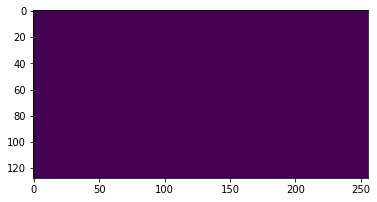

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
z=0
slice=sitk.GetArrayViewFromImage(image)[z,:,:]
print(slice.shape)
plt.imshow(slice)

slices=sitk.GetArrayViewFromImage(image)[1:10,:,:]
print(slices.shape)
print(slices[1].shape)
plt.imshow(slices[1])

(128, 128)


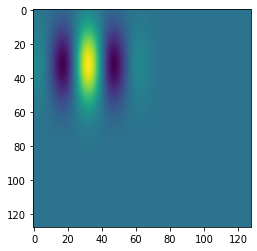

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('image', aspect='equal')
import SimpleITK as sitk
# Download data to work on
# %run update_path_to_download_script
# from downloaddata import fetch_data as fdata

# import sys, os
# download_script_location = os.path.abspath(os.path.join('..','Utilities'))
# if not download_script_location in sys.path:
#     sys.path.append(download_script_location)

img = sitk.GaussianSource(size=[128]*2)
print(img.GetSize())
plt.imshow(sitk.GetArrayViewFromImage(img))

img = sitk.GaborSource(size=[128]*2, frequency=.03)
plt.imshow(sitk.GetArrayViewFromImage(img))

def myshowf(img):
    nda=sitk.GetArrayViewFromImage(img)
    plt.imshow(nda)
myshowf(img)

(128, 128)
(256, 256)


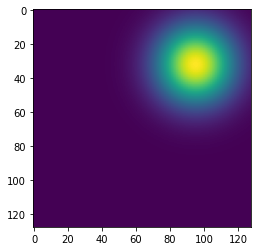

In [27]:
img = sitk.GaussianSource(size=[128]*2)
myshowf(img[16:48,:])
myshowf(img[:,16:-16])
myshowf(img[:32,:32])
img1=sitk.GetArrayFromImage(img[::-1,:])
print(img1.shape)
myshowf(img[::-1,:])
img_corner=img
img2=sitk.Tile(img_corner, img_corner[::-1,::],img_corner[::,::-1],img_corner[::-1,::-1], [2,2])
img3=sitk.GetArrayFromImage(img2)
print(img3.shape)


(64, 64, 64)
(64, 22)


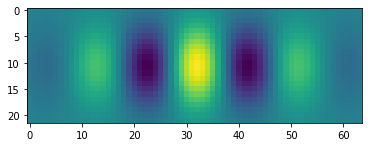

In [28]:
# Slice Extraction
# A 2D image can be extracted from a 3D one.

img = sitk.GaborSource(size=[64]*3, frequency=0.05)
print(img.GetSize())

# img4 = sitk.GaborSource(size=[64]*4, frequency=0.05)
# print(img4.GetSize())

# Why does this produce an error?
#myshowf(img)

myshowf(img[:,:,32])
myshowf(img[16,:,:])
#Subsampling
print(img[:,::3,32].GetSize())
myshowf(img[:,::3,32])